## Dr. Ignaz Semmelweis

Reanalyze the data that made Semmelweis discover the importance of handwashing. 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

display(yearly)

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [13]:
yearly["proportion_deaths"] = yearly['deaths']/yearly['births']

yearly1 = yearly[yearly['clinic'] == 'clinic 1']
yearly2 = yearly[yearly['clinic'] == 'clinic 2']

display(yearly1)
display(yearly2)

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


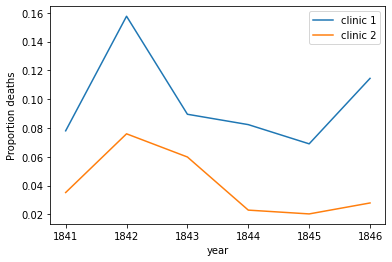

In [14]:
ax = yearly1.plot(x='year', y='proportion_deaths', label='clinic 1')
ax.set_ylabel("Proportion deaths")

yearly2.plot(x='year', y='proportion_deaths', label='clinic 2', ax=ax)

plt.show()

In [15]:
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

monthly["proportion_deaths"] = monthly['deaths']/monthly['births']

display(monthly.head())

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


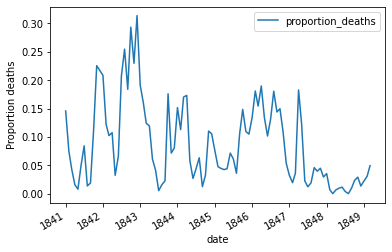

In [16]:
ax = monthly.plot(x='date', y='proportion_deaths')
ax.set_ylabel("Proportion deaths")

plt.show()

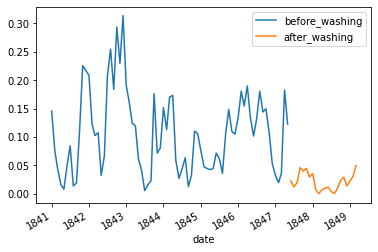

In [17]:
handwashing_start = pd.to_datetime('1847-06-01')

before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

ax = before_washing.plot(x='date', y='proportion_deaths', label='before_washing')

after_washing.plot(x='date', y='proportion_deaths', label='after_washing', ax=ax)

ax.ylabel = "Proportion deaths"

plt.show()

In [18]:
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = (after_proportion.mean())-(before_proportion.mean())
mean_diff

-0.08395660751183336

In [20]:
# A Bootstrap analysis of Semmelweis handwashing data

boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(np.mean(boot_after)-np.mean(boot_before))

confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100704
0.975   -0.067872
dtype: float64

## Conclusions

 -So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. 
 All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.

The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as bacteria) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.

One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.